In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Leer el conjunto de datos
df = pd.read_csv(r"C:\Users\BPCJR\Documents\rp\ejercicios\Dataset- Superstore (2015-2018).csv")

# Seleccionar las columnas 'Order Date' y 'Sales'
datos_ventas = df[['Order Date', 'Sales']]

# Convertir 'Order Date' a tipo datetime
datos_ventas['Order Date'] = pd.to_datetime(datos_ventas['Order Date'])

# Imprimir las primeras filas
print(datos_ventas.head())

df1 = datos_ventas.set_index('Order Date')


  Order Date     Sales
0 2016-11-08  261.9600
1 2016-11-08  731.9400
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680


C:\Users\BPCJR\AppData\Local\Temp\ipykernel_1928\438787825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ventas['Order Date'] = pd.to_datetime(datos_ventas['Order Date'])


In [3]:
# Agrupar las ventas por mes
ventas_mensuales = df1.resample('M').mean()
ventas_mensuales.head()

C:\Users\BPCJR\AppData\Local\Temp\ipykernel_1928\3029352648.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df1.resample('M').mean()


,Sales
Order Date,
2014-01-31,180.213861
2014-02-28,98.258522
2014-03-31,354.719803
2014-04-30,209.595148
2014-05-31,193.838418


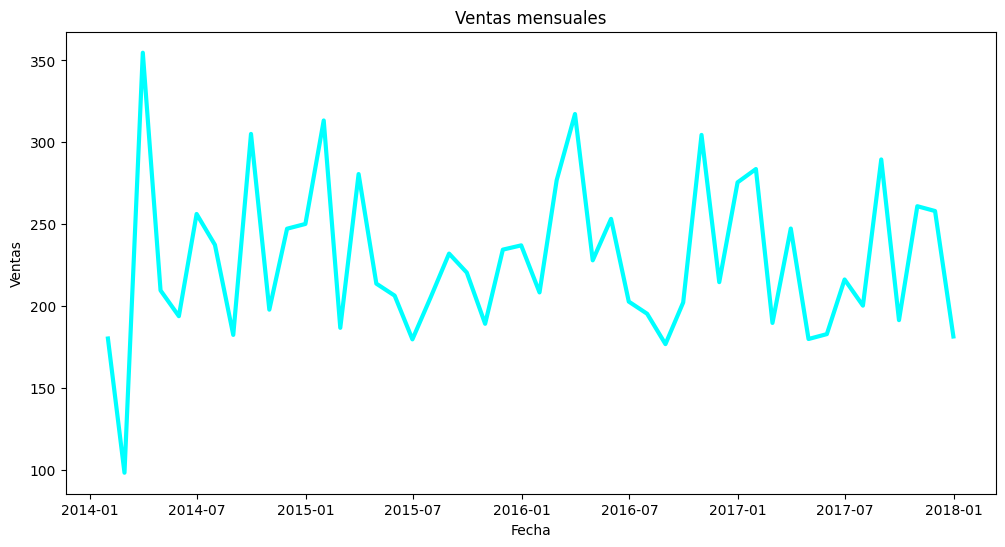

In [4]:
# Graficar las ventas mensuales
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['Sales'], linewidth=3, c='cyan')
plt.title("Ventas mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

In [5]:
def verificar_estacionariedad(serie_temporal):
    # Realizar la prueba de Dickey-Fuller
    resultado = adfuller(serie_temporal, autolag='AIC')
    valor_p = resultado[1]
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'Valor p: {valor_p}')
    print('Estacionario' if valor_p < 0.05 else 'No estacionario')


In [6]:
# Verificar la estacionariedad de las ventas mensuales
verificar_estacionariedad(ventas_mensuales['Sales'])


Estadístico ADF: -3.2865668298704316
Valor p: 0.015489720191097255
Estacionario


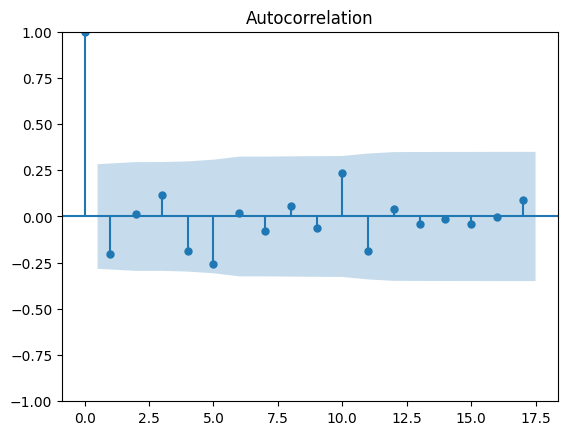

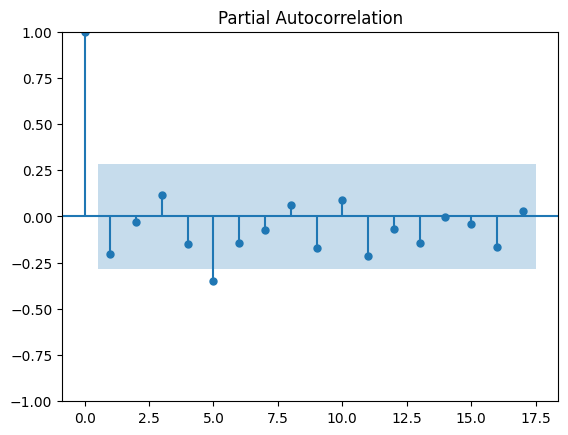

In [7]:
# Graficar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF)
plot_acf(ventas_mensuales)
plot_pacf(ventas_mensuales)
plt.show()


In [8]:
# Definir los parámetros del modelo SARIMA
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Suponiendo estacionalidad mensual

In [9]:
# Ajustar el modelo SARIMA
modelo = SARIMAX(ventas_mensuales, order=(p, d, q), seasonal_order=(P, D, Q, s))
resultados = modelo.fit()
modelo

C:\Users\BPCJR\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [10]:
# Pronosticar los valores futuros
periodos_pronostico = 12  # Pronosticar los próximos 12 meses
pronostico = resultados.get_forecast(steps=periodos_pronostico)
media_pronostico = pronostico.predicted_mean
intervalo_confianza = pronostico.conf_int()

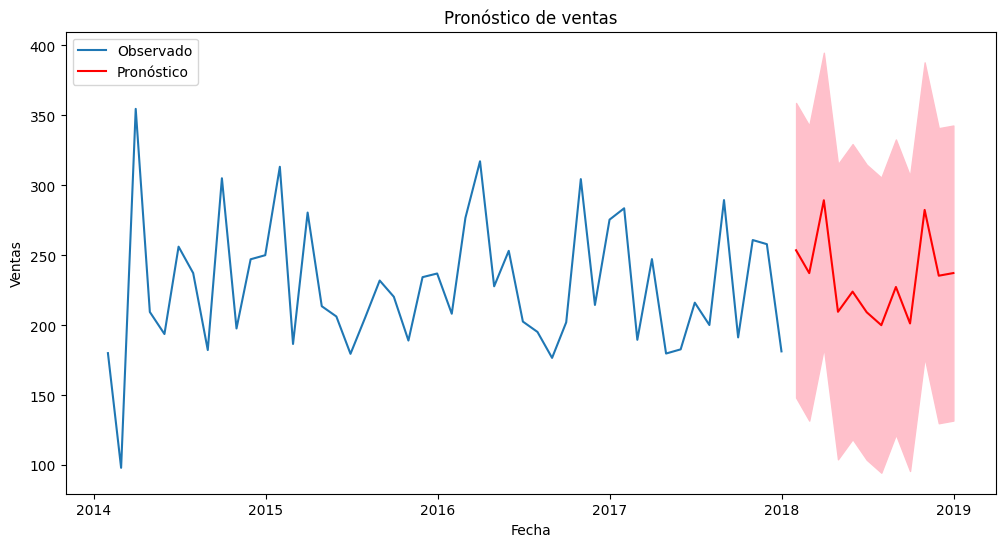

In [11]:
# Graficar el pronóstico
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales, label='Observado')
plt.plot(media_pronostico, label='Pronóstico', color='red')
plt.fill_between(intervalo_confianza.index, intervalo_confianza.iloc[:, 0], intervalo_confianza.iloc[:, 1], color='pink')
plt.title("Pronóstico de ventas")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.show()